In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy.fft as fft

In [17]:
def fft_1d(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N==1:
        return x

    X_even = fft_1d(x[::2])
    X_odd = fft_1d(x[1::2])
    cons = np.exp(-2j * np.pi * np.arange(N//2) / N)
    a = np.asarray(X_even + cons * X_odd)
    b = np.asarray(X_even - cons * X_odd)
    return np.concatenate((a,b))

def fft_2d(img):
    img = np.asarray(img, dtype=float)
    out = np.zeros(img.shape, dtype=complex)
    
    for i in range(img.shape[0]):
        out[i,:] = fft_1d(img[i,:])
    
    out1 = np.zeros(img.shape, dtype=complex)
    for i in range(img.shape[1]):
        out1[:,i] = fft_1d(out[:,i])
    
    return out1

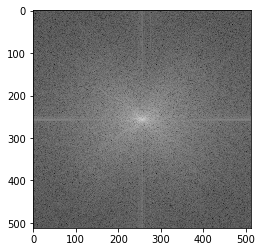

In [22]:
img = cv2.cvtColor(cv2.imread('DIP_2019_A3/lena.jpg'),cv2.COLOR_BGR2GRAY)
out = np.log(1+fft.fftshift(fft_2d(img)))
plt.imshow(np.abs(out),'gray')
plt.show()

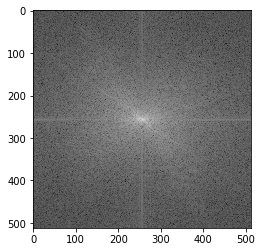

In [19]:
img = cv2.cvtColor(cv2.imread('DIP_2019_A3/lena.jpg'),cv2.COLOR_BGR2GRAY)
out = np.log(1+fft.fftshift(np.fft.fft2(img)))
plt.imshow(np.abs(out),'gray')
plt.show()